In [2]:
#Import all of our necessary libraries

import os
import pandas as pd


In [3]:
#Our folder of interest is named test_data
#We will get a list of all the files in this folder and create an empty data frame for later modification
folder_name = 'test_data'
files = ['%s/%s' % (folder_name, x) for x in os.listdir('%s' % folder_name)]
data = pd.DataFrame()

In [4]:
#Loop through all of our files, checking that they are of drift type, meaning that they have the required format and information.


i = 0
for file in files:
    if 'drift' in file:
        
        #Open the file
        f = open('%s' % file, 'r')
        
        #Progress statement
        print("\rProcessing file: %i" % (i), end='')
        
        #Create empty dictionary to hold our data
        d = {}
        
        #Some statistical counters for node false positives, negatives, grid false positives, etc.
        nfp = 0
        nfn = 0
        ntp = 0
        
        gfp = 0
        gfn = 0
        gtp = 0
        
        num_iters = 0
        
        #Helper to get run details such as number of nodes
        details = True
        
        try:
            for line in f:  #loop through lines
                line = line.rstrip()
                if '-----' in line or 'ID' in line:
                    details = False
                if details:
                    xx = line.split(': ')
                    try:
                        d[xx[0]] = float(xx[1])
                    except:
                        d[xx[0]] = xx[1]
                if '-----' in line:
                    num_iters += 1
                    
                #Start keeping track of different values
                if 'Node' in line:
                    if 'True Positive' in line:
                        ntp += 1
                    if 'False Positive' in line:
                        nfp += 1
                    if 'False Negative' in line:
                        nfn += 1
                elif 'Grid' in line:
                    if 'True Positive' in line:
                        gtp += 1
                    if 'False Positive' in line:
                        gfp += 1
                    if 'False Negative' in line:
                        gfn += 1

            d['iters'] = num_iters
            d['node_true_positive'] = ntp
            d['node_false_positive'] = nfp
            d['node_false_negative'] = nfn

            d['grid_true_positive'] = gtp
            d['grid_false_positive'] = gfp
            d['gird_false_negative'] = gfn

            f.close()
            #print(d)
            x = pd.DataFrame.from_dict(d, orient='index').transpose()
            #print(x)
            data = data.append(x)
        except:
            pass
        i += 1
        

Processing file: 27

c:\users\patrick\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Processing file: 599

In [5]:
pd.set_option('display.max_columns', 500)
data
data = data.apply(pd.to_numeric, errors='ignore')
data

,Battery Natural Loss,Bomb x,Bomb y,Columns,Detection Threshold,Grid False Negative Avg,Height,Input File Name,Iterations,Number of Nodes,Output File Name,Printing Position,Rows,Samples Stored by Grid,Samples Stored by Node,Sensor Loss,Size of Square,Super Nodes,Width,gird_false_negative,grid_false_positive,grid_true_positive,iters,node_false_negative,node_false_positive,node_true_positive
0,0.005,425.0,425.0,100.0,20.0,NaN,500.0,Scenario_1.txt,1000.0,10000.0,Log_0,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,0,0,5,89,46,0,63
0,0.005,425.0,425.0,100.0,20.0,9.7326565 Square Row,500.0,Scenario_1.txt,1000.0,10000.0,Log_1,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,1,0,4,84,32,0,101
0,0.005,425.0,425.0,100.0,20.0,NaN,500.0,Scenario_1.txt,1000.0,10000.0,Log_10,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,0,0,5,76,33,0,46
0,0.005,425.0,425.0,100.0,21.5,NaN,500.0,Scenario_1.txt,1000.0,10000.0,Log_100,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,0,0,5,76,50,0,64
0,0.005,425.0,425.0,100.0,21.5,NaN,500.0,Scenario_1.txt,1000.0,10000.0,Log_101,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,1,0,2,82,70,0,80
0,0.005,425.0,425.0,100.0,21.5,NaN,500.0,Scenario_1.txt,1000.0,10000.0,Log_102,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,1,0,4,76,44,0,77
0,0.005,425.0,425.0,100.0,21.5,NaN,500.0,Scenario_1.txt,1000.0,10000.0,Log_103,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,0,0,4,75,30,0,47
0,0.005,425.0,425.0,100.0,21.5,NaN,500.0,Scenario_1.txt,1000.0,10000.0,Log_104,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,0,0,5,86,36,0,60
0,0.005,425.0,425.0,100.0,21.5,NaN,500.0,Scenario_1.txt,1000.0,10000.0,Log_105,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,0,0,5,75,27,0,73
0,0.005,425.0,425.0,100.0,21.5,16.028461 Square Row,500.0,Scenario_1.txt,1000.0,10000.0,Log_106,false Printing Energy,100.0,10.0,10.0,0.001 GPS Loss,5 x 5,4 Super Node Type,500.0,1,0,4,83,34,0,96


In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of True Positives')

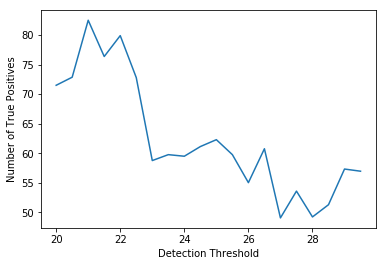

In [9]:
d = []

for i in range(20):
    x = data[(data['Detection Threshold'] == (20+.5*i)) & (data['Number of Nodes'] == 10000)]
    d.append(x['node_true_positive'].mean())
plt.plot([20+.5*i for i in range(20)], d)
plt.xlabel("Detection Threshold")
plt.ylabel("Number of True Positives")